In [1]:
# Restart the kernel
import os
current_dir ='../../'
os.chdir(current_dir)

In [2]:
from src.codes.basic import *
from src.codes.utils import *
from src.codes.base_classes import Base_class_fem_heat_conduction
from src.codes.reductor.rom_class import FEM_solver_rom_ecsw
from src.codes.algorithms.ecsw import ecsw_red


### class for data (geometry, material property, mesh)

In [3]:
nref= [20,2]
L = [20,20]
mat_layout = np.zeros((5,2),dtype=int)
src_layout = np.zeros((5,2),dtype=int)

In [4]:
fdict = {}

cond_list = []
cond_list.append( lambda T,mu: mu*T + 100. + 0.*T )
fdict["cond"] = cond_list

dcond_list = []
dcond_list.append( lambda T,mu: mu + 0. + 0.*T )
fdict["dcond"] = dcond_list

qext_list = []
qext_list.append( lambda T,mu: 0.0+1.0 + 0.*T )
fdict["qext"] = qext_list

In [5]:
bc = {}
bc['x_min']={'type':'dirichlet','value':10.0}
bc['x_max']={'type':'dirichlet','value':7.0}
bc['y_min']={'type':'refl','value':np.nan}
bc['y_max']={'type':'refl','value':np.nan}

In [6]:
class probdata:
    
    def __init__(self, bc, cond_layout, qext_layout, fdict, nref, L, mu, pb_dim=2):
        
        self.dim_ = pb_dim
        # refine the mesh and update material and source layouts
        repeats = np.asarray(nref, dtype=int)
        self.cell2mat_layout = self.repeat_array(mat_layout,repeats)
        self.cell2src_layout = self.repeat_array(src_layout,repeats)
        
        ## change this mapping if needed.
        
        self.fdict = fdict
        
        # mesh data
        # cells
        self.ncells = [None] * pb_dim
        self.npts = [None] * pb_dim
        self.deltas = [None] * pb_dim
        self.xi=[]
        for i in range(pb_dim):
            self.ncells[i] = self.cell2mat_layout.shape[i]
            self.npts[i] = self.ncells[i]+1
            self.xi.append(np.linspace(0,L[i],self.npts[i]))
            self.deltas[i] = L[i]/self.ncells[i]
    
        self.n_verts = np.prod(np.array(self.npts))
                
        # Create nodal connectivity for the continuous Finite Element Method (cFEM)
        self.connectivity()
                
        # Store parameter value
        self.mu = mu
        
        # Store the dirichlet nodes if any
        handle_boundary_conditions(self, bc)
        
        # Determining the global equation numbers based on dirichlet nodes and storing in class
        get_glob_node_equation_id(self, self.dir_nodes)

        # Get global node numbers and equation IDs for the current element
        self.glob_node_eqnId = []
        self.glob_node_nonzero_eqnId = []
        self.local_node_nonzero_eqnId = []
        self.Le = []
        self.global_indices = []
        self.local_indices = []

        for i in range(self.n_cells):
            get_element_global_nodes_and_nonzero_eqnId(self, i, self.node_eqnId)

    
              
    def repeat_array(self, arr,repeats):
        for dim,n in enumerate(repeats):
            arr = np.repeat(arr,n,axis=dim)
        return arr     
    
    
    def connectivity(self):
        """
        Define nodal connectivity for each cell in the mesh.
        """

        # Initialize the connectivity array
        self.n_cells = np.prod(np.array(self.ncells))
        
        self.gn = np.zeros((self.n_cells,2**self.dim_),dtype=int)

        # compute node ID from (i,j) cell identifiers
        # def node(*args):
        #     index = 0
        #     multiplier = 1
        #     for i, n in enumerate(args):
        #         index += n * multiplier
        #         if i < len(self.npts) - 1:
        #             multiplier *= self.npts[i]
        #     return index
        
        node = lambda i,j: i+j*self.npts[0]

        # Loop over all cells to define their nodal connectivity
        iel = 0
        for j in range(self.ncells[1]):
            for i in range(self.ncells[0]):
                # counter-clockwise
                self.gn[iel,0] = node(i  ,j  )
                self.gn[iel,1] = node(i+1,j  )
                self.gn[iel,2] = node(i+1,j+1)
                self.gn[iel,3] = node(i  ,j+1)
                iel += 1
  

### Simulate FOS

In [7]:
random.seed(25)
params = np.r_[1.:4.0:0.01]
quad_deg = 3
N_snap = 15 # Training Snapshots
NL_solutions = []
param_list = []
K_mus = []
q_mus = []
# 

initial residual = 17144.284896850124 

iter 0, NL residual=1921.279967460578, delta=9.08404158334369
iter 1, NL residual=17.808924517615786, delta=-0.35563312791475354
iter 2, NL residual=0.0017382984440488336, delta=-0.0015344631948855621
iter 3, NL residual=1.3623463033484406e-10, delta=-2.856807866585712e-08
Convergence !!!


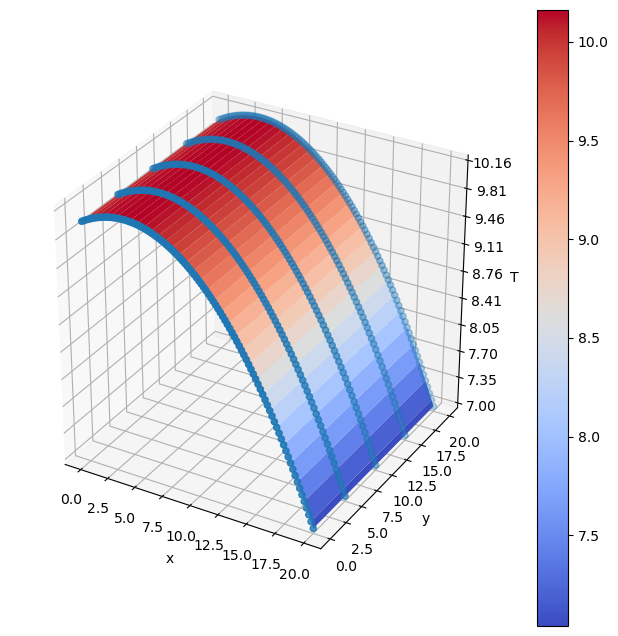

initial residual = 15613.6176292613 

iter 0, NL residual=620.8173517470614, delta=8.636917031440007
iter 1, NL residual=0.9470139450075464, delta=-0.1353777651462258
iter 2, NL residual=2.4505708360446767e-06, delta=-9.114024058020844e-05
Convergence !!!


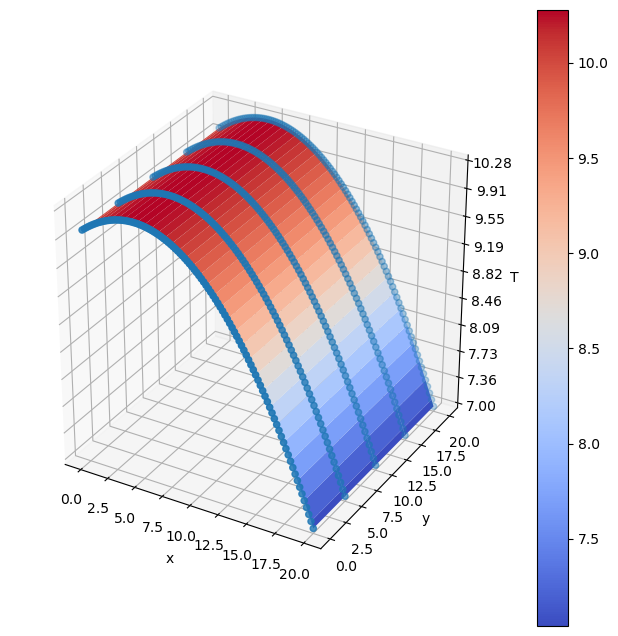

initial residual = 16452.807371077037 

iter 0, NL residual=1299.3368505613662, delta=8.883749668031859
iter 1, NL residual=6.731803308393219, delta=-0.25850269247804974
iter 2, NL residual=0.00020273359162679568, delta=-0.0006082618862644655
iter 3, NL residual=1.0169512588873905e-10, delta=-3.3677841884788243e-09
Convergence !!!


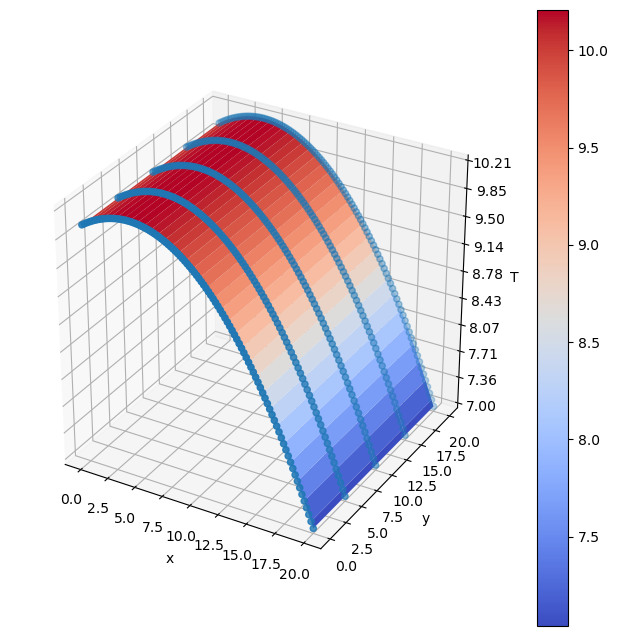

initial residual = 16839.66628590374 

iter 0, NL residual=1640.3284265545888, delta=8.996105834925906
iter 1, NL residual=12.09476041376948, delta=-0.313317703698815
iter 2, NL residual=0.000742560773098846, delta=-0.0010636958535181215
iter 3, NL residual=1.381629238478365e-10, delta=-1.2260043465502232e-08
Convergence !!!


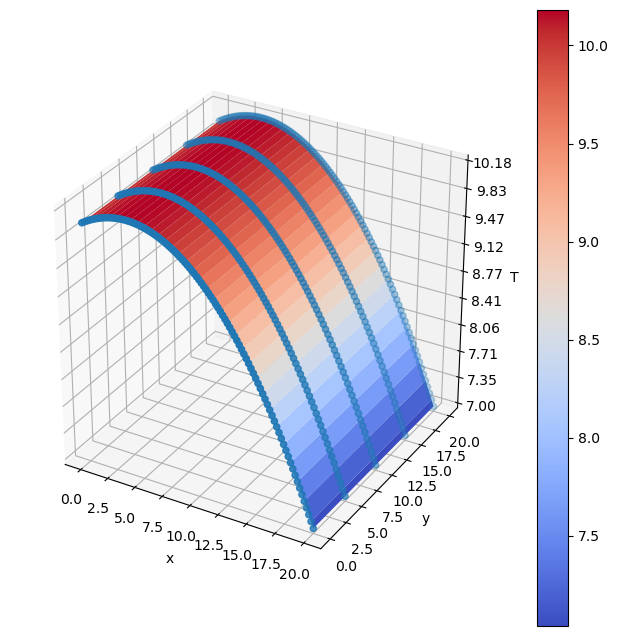

initial residual = 17547.78785210508 

iter 0, NL residual=2310.2369323387156, delta=9.199557566000198
iter 1, NL residual=27.644347704061076, delta=-0.4105555237540551
iter 2, NL residual=0.004536735790515995, delta=-0.0023203575235675273
iter 3, NL residual=1.7760580798442316e-10, delta=-7.412225067841316e-08
Convergence !!!


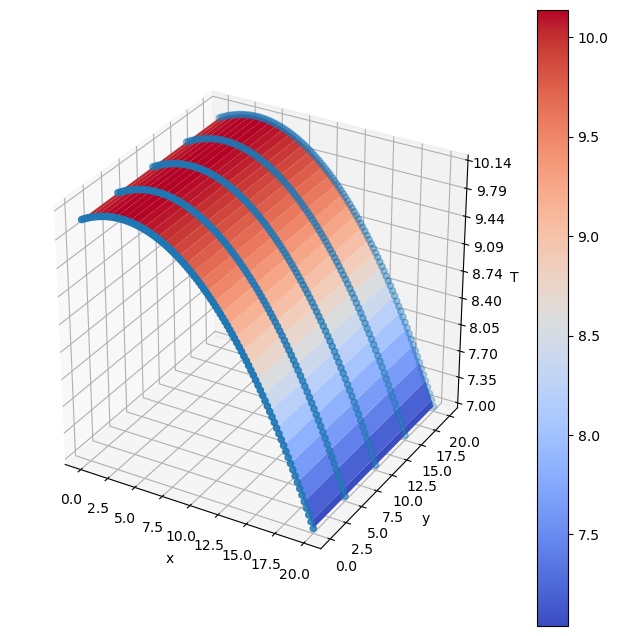

initial residual = 15728.76786675185 

iter 0, NL residual=708.945755208931, delta=8.671035219253648
iter 1, NL residual=1.3608954819480288, delta=-0.15261827000319814
iter 2, NL residual=5.580618590720032e-06, delta=-0.00012979139611752347
Convergence !!!


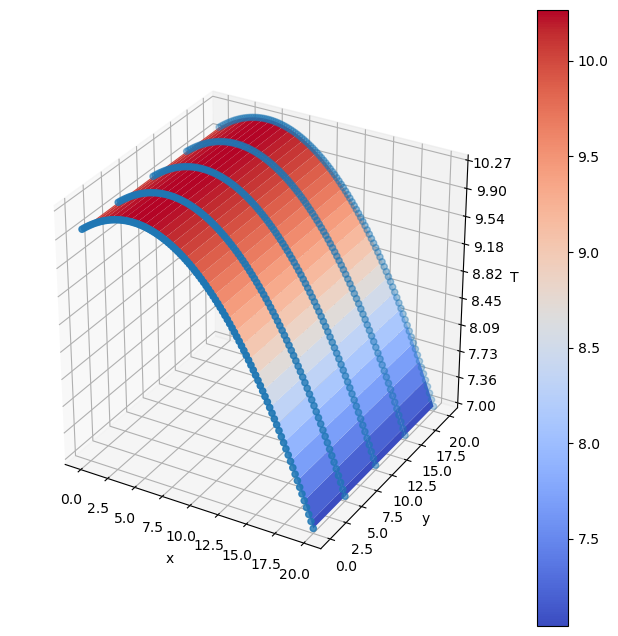

initial residual = 16625.646527001252 

iter 0, NL residual=1449.4924498935468, delta=8.93419355035973
iter 1, NL residual=8.882052116301356, delta=-0.28314251522660044
iter 2, NL residual=0.00037521172939199035, delta=-0.0007928022362034501
iter 3, NL residual=1.26605381633743e-10, delta=-6.215707092685019e-09
Convergence !!!


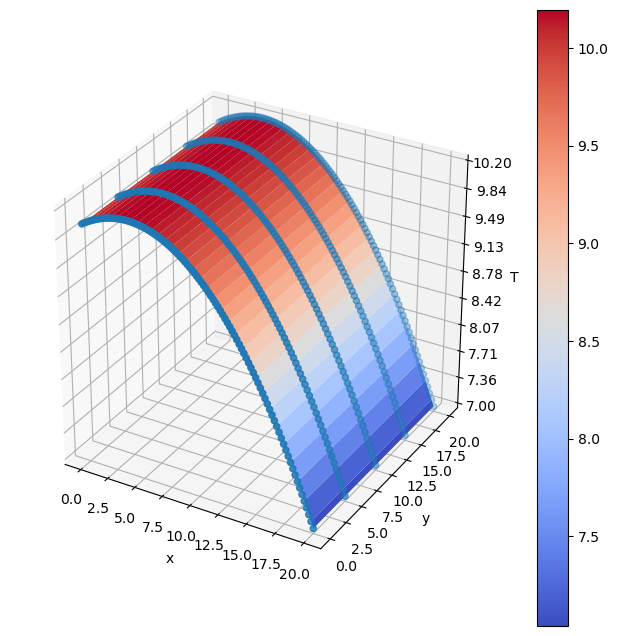

initial residual = 15695.86668709735 

iter 0, NL residual=683.6035258051377, delta=8.661245135394825
iter 1, NL residual=1.2325683502099896, delta=-0.14770353992321156
iter 2, NL residual=4.458226672002862e-06, delta=-0.00011785546852688839
Convergence !!!


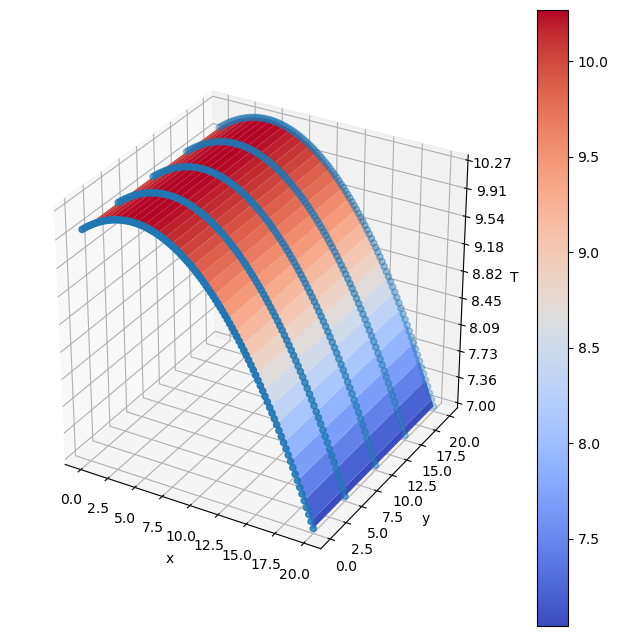

initial residual = 16839.66628590374 

iter 0, NL residual=1640.3284265545888, delta=8.996105834925906
iter 1, NL residual=12.09476041376948, delta=-0.313317703698815
iter 2, NL residual=0.000742560773098846, delta=-0.0010636958535181215
iter 3, NL residual=1.381629238478365e-10, delta=-1.2260043465502232e-08
Convergence !!!


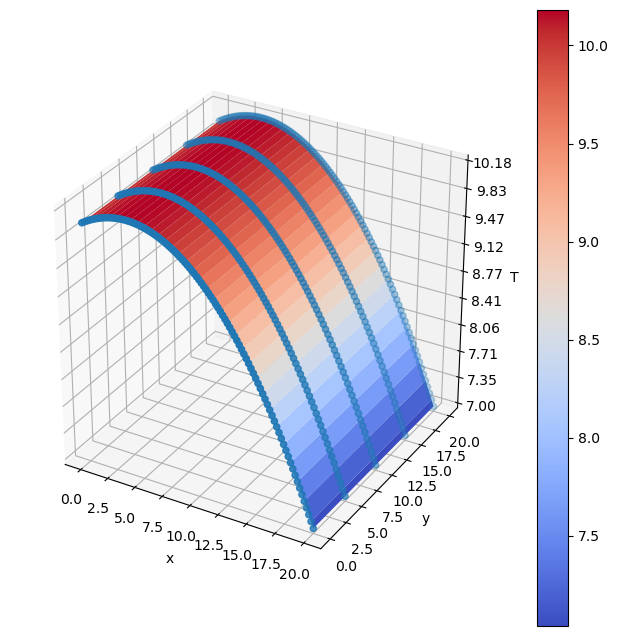

initial residual = 17934.910893204833 

iter 0, NL residual=2701.305564165969, delta=9.30953433274794
iter 1, NL residual=39.73770977998562, delta=-0.4620611244297236
iter 2, NL residual=0.009948423510188828, delta=-0.0032557624884129418
iter 3, NL residual=6.472081273986515e-10, delta=-1.6165990959757382e-07
Convergence !!!


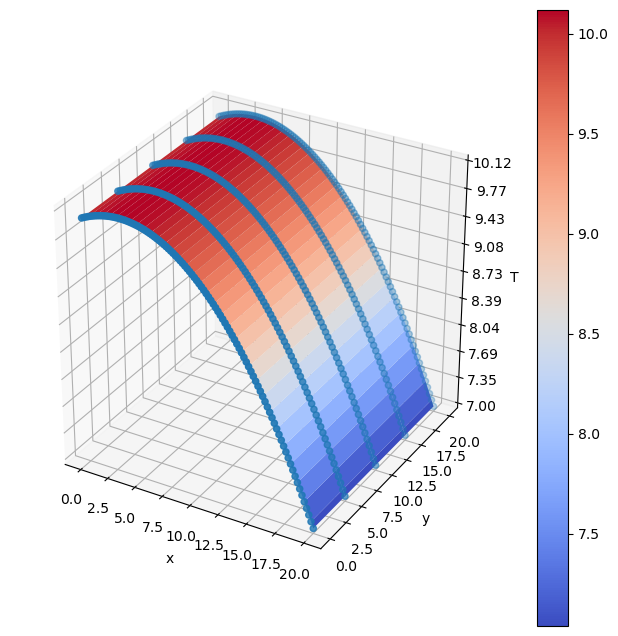

initial residual = 17341.90667589103 

iter 0, NL residual=2109.3906582304553, delta=9.140758231629171
iter 1, NL residual=22.28853222123092, delta=-0.3826916967061404
iter 2, NL residual=0.0028389131393915215, delta=-0.0018957200736795052
iter 3, NL residual=1.4642503118775013e-10, delta=-4.652061161914439e-08
Convergence !!!


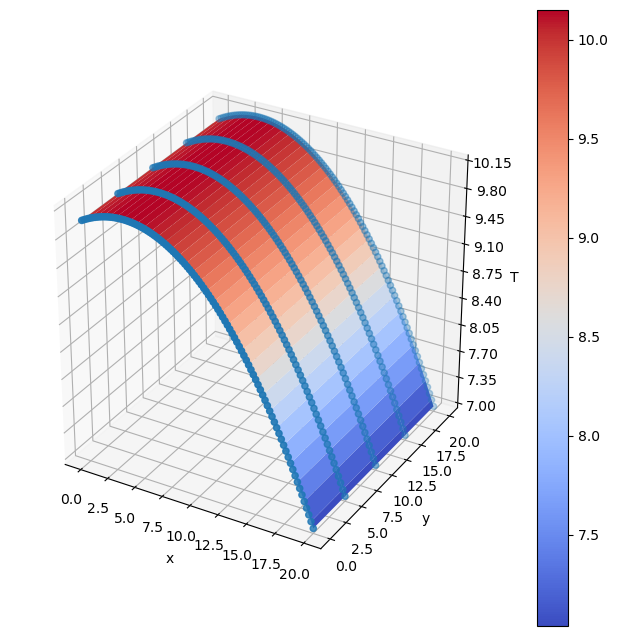

initial residual = 15959.1004895412 

iter 0, NL residual=889.9828131108635, delta=8.739139902466176
iter 1, NL residual=2.508835770274209, delta=-0.18677259541385371
iter 2, NL residual=2.2229594828249197e-05, delta=-0.00023507186191065732
iter 3, NL residual=1.0852068291651326e-10, delta=-3.7237189402127224e-10
Convergence !!!


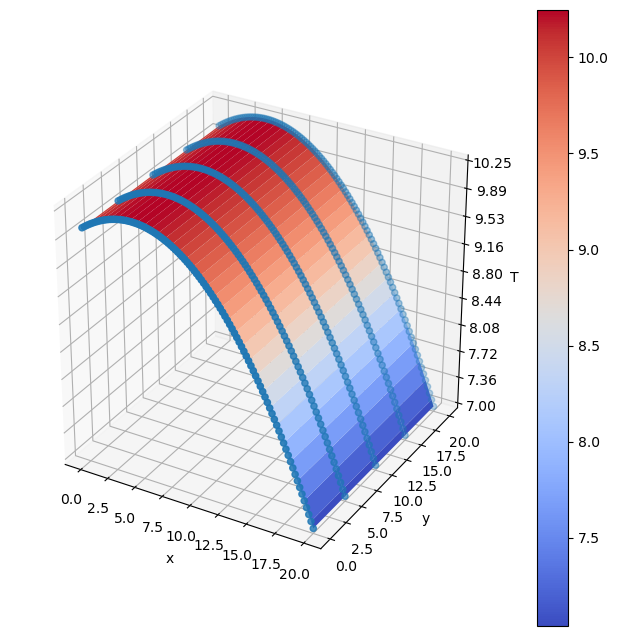

initial residual = 16074.282414185584 

iter 0, NL residual=982.8889091506495, delta=8.772926016034377
iter 1, NL residual=3.263328421151588, delta=-0.20368690895280853
iter 2, NL residual=4.0158543862329166e-05, delta=-0.00030312751746936
iter 3, NL residual=1.1069249897285862e-10, delta=-6.713624761021275e-10
Convergence !!!


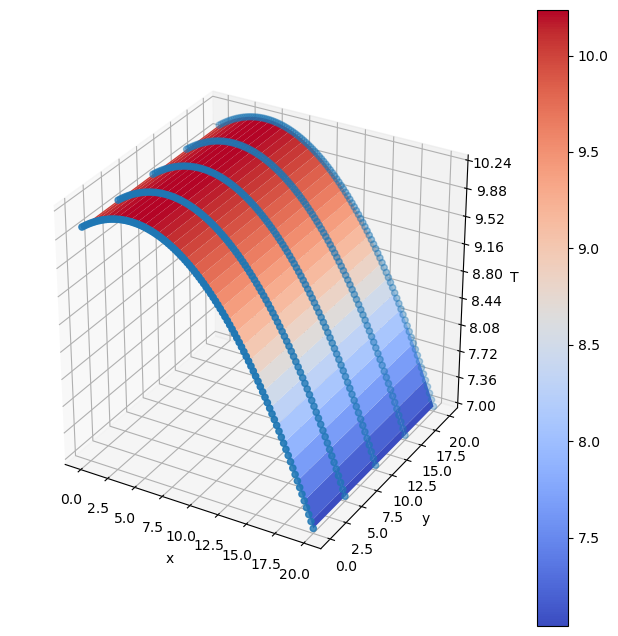

initial residual = 17976.099119324947 

iter 0, NL residual=2743.9407708968884, delta=9.321142569367858
iter 1, NL residual=41.186616193660974, delta=-0.4674736982086066
iter 2, NL residual=0.010746369259157819, delta=-0.0033659758502428637
iter 3, NL residual=7.580675584714636e-10, delta=-1.7452742152652804e-07
Convergence !!!


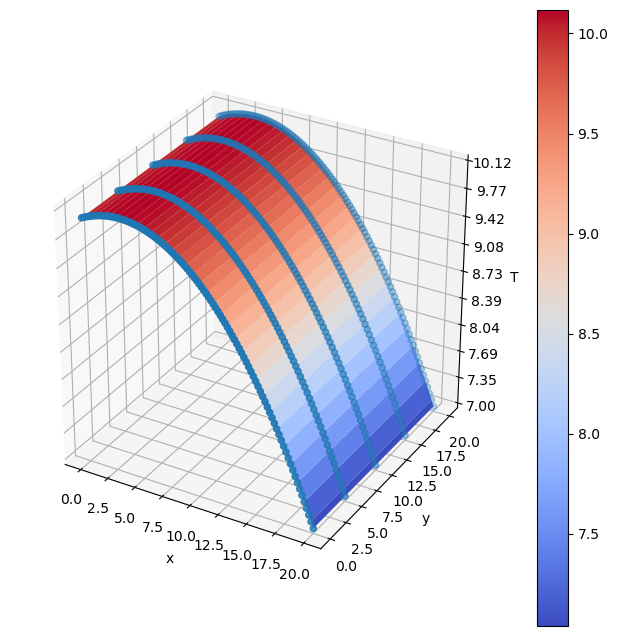

initial residual = 16378.73990387675 

iter 0, NL residual=1236.0753099355354, delta=8.862221061683448
iter 1, NL residual=5.924338801972951, delta=-0.24786917230453243
iter 2, NL residual=0.00015252125375643148, delta=-0.0005381533459185612
iter 3, NL residual=1.0303320787901219e-10, delta=-2.536757327471831e-09
Convergence !!!


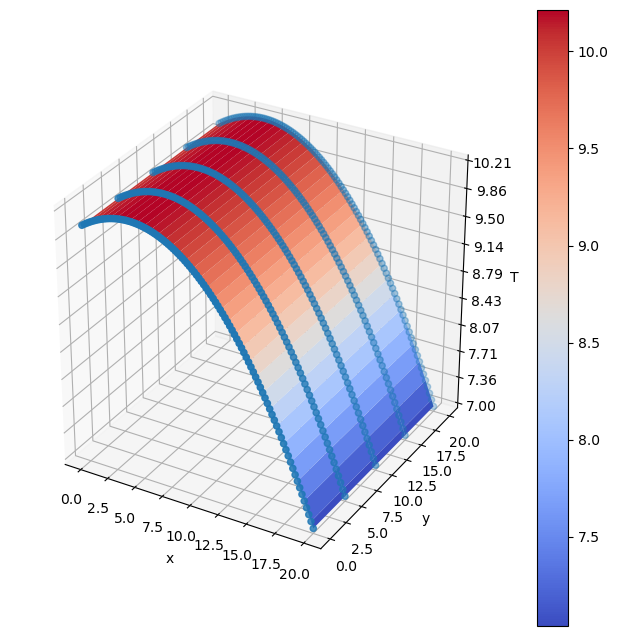

In [8]:
for i in range(N_snap):
    param = random.choice(params) # Choose from parameter list
    param_list.append(param)
    
    if i==0:
        d = probdata(bc, mat_layout, src_layout, fdict, nref, L, param, pb_dim=2)
        FOS = Base_class_fem_heat_conduction(d,quad_deg)
    else:
        FOS.mu = param
    T_init = np.zeros(d.n_verts) + 2.0
    NL_solution_p, Ke, rhs_e, mask = solve_fos(FOS, T_init)
    NL_solutions.append(NL_solution_p.flatten())
    K_mus.append(Ke)
    q_mus.append(rhs_e)
    plot2D(d.xi[0], d.xi[1], NL_solution_p)

In [9]:
NLS = np.asarray(NL_solutions)
np.shape(NLS)

(15, 505)

### ECSW Hyper-reduction


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

In [10]:
n_sel = 6
U, S, Vt = np.linalg.svd(np.transpose(NLS), full_matrices=False)
V_sel = U[:, :n_sel]
P_sel = V_sel[mask,:]@np.transpose(V_sel[mask,:])

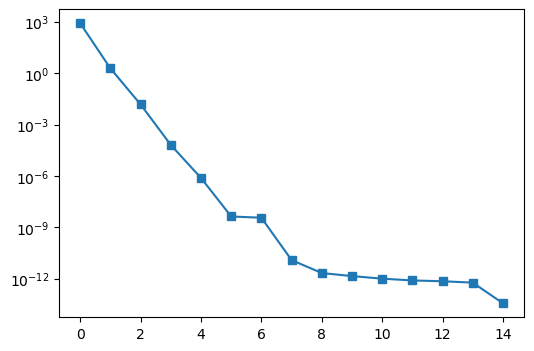

In [11]:
plt.figure(figsize = (6,4))
plt.semilogy(S,'s-')
plt.show()

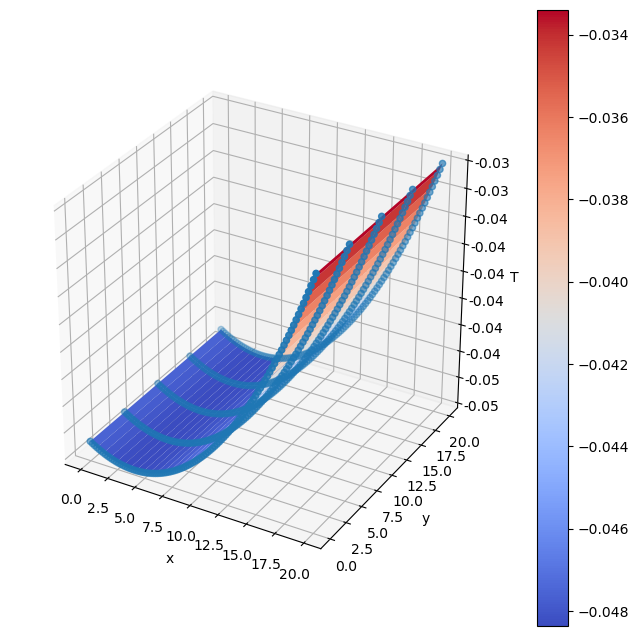

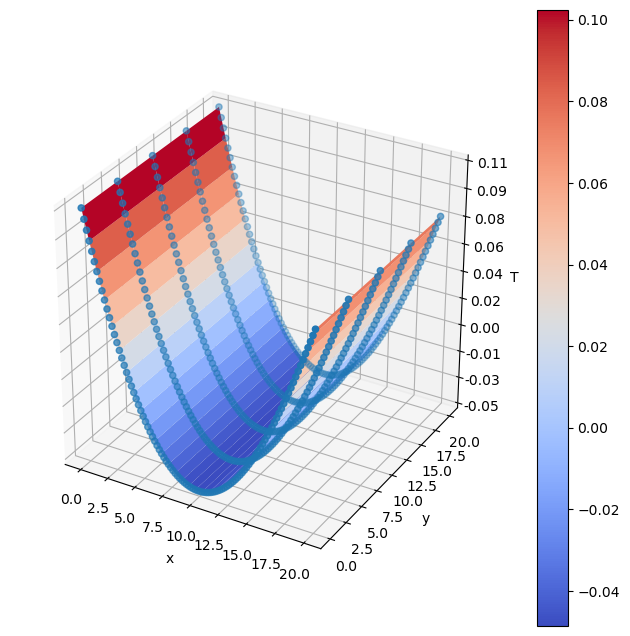

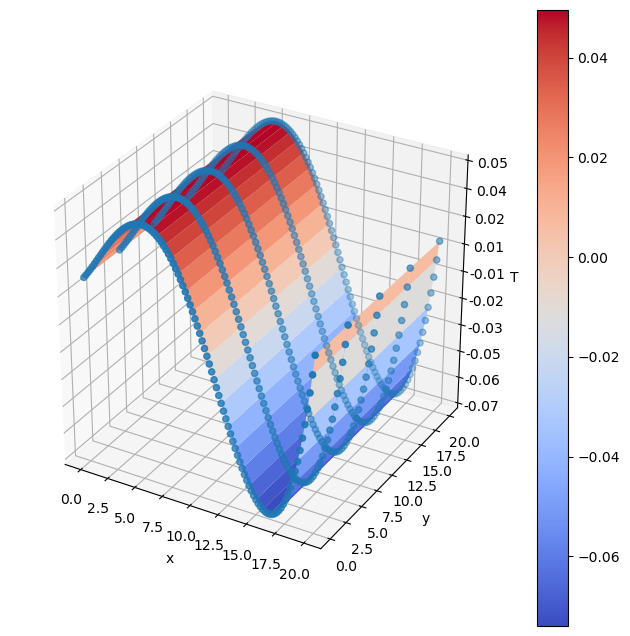

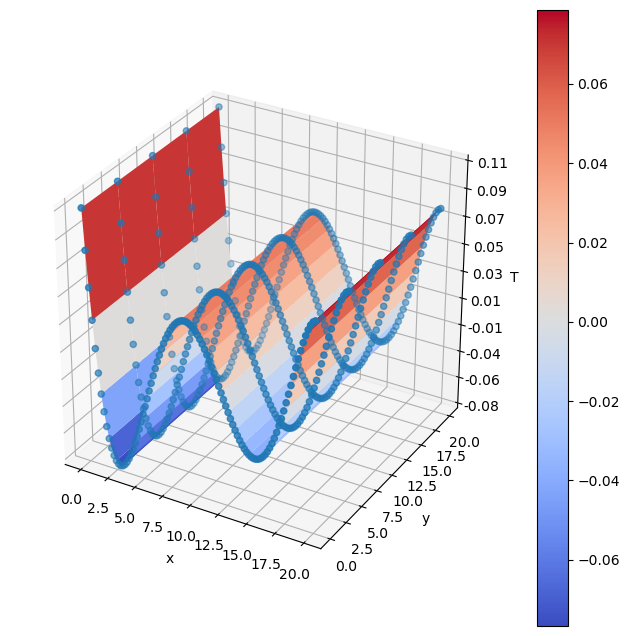

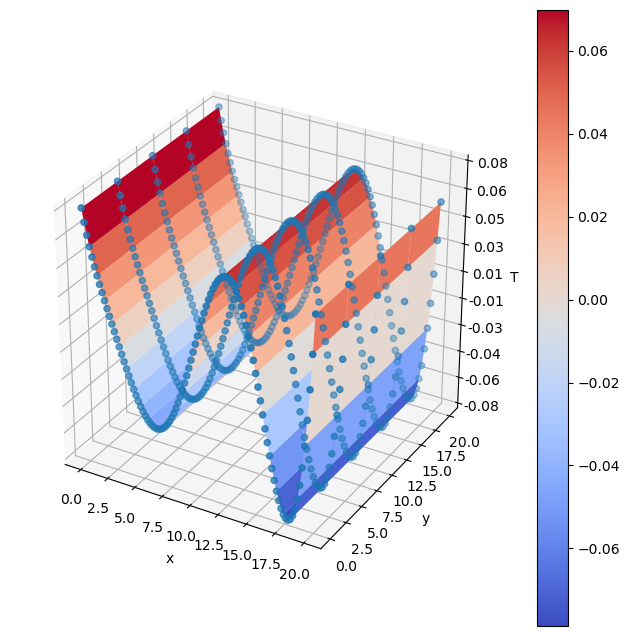

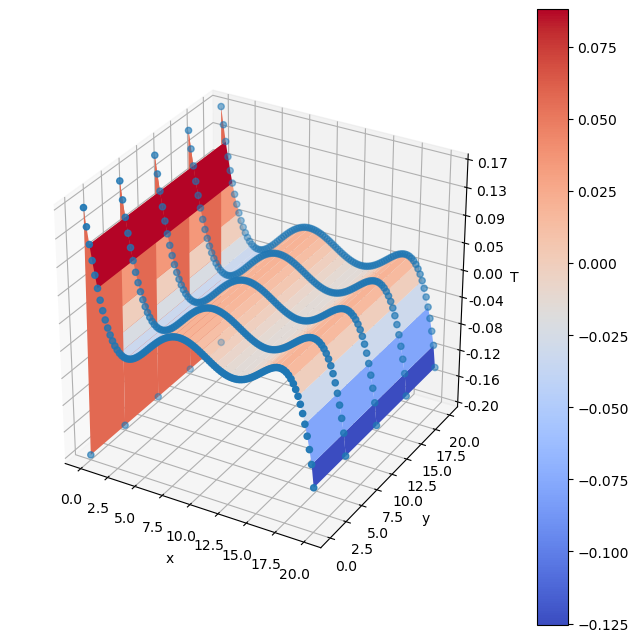

In [12]:
for i in range(n_sel):
    plot2D(d.xi[0], d.xi[1], V_sel[:,i])


#### ECSW

In [13]:
tic_h_setup_b = time.time()
tol = 1e-15
xi, residual = ecsw_red(d, V_sel, d.Le, K_mus, q_mus, P_sel, tol, n_sel, N_snap, mask,NL_solutions)
toc_h_setup_b = time.time()

In [14]:
print(f"this is the residual from fnnls: {residual}")

this is the residual from fnnls: 1.3633390868194743e-09


In [15]:
colors = ['red' if value > 0 else 'blue' for value in xi]
sizes = [15 if value > 0 else 1 for value in xi]

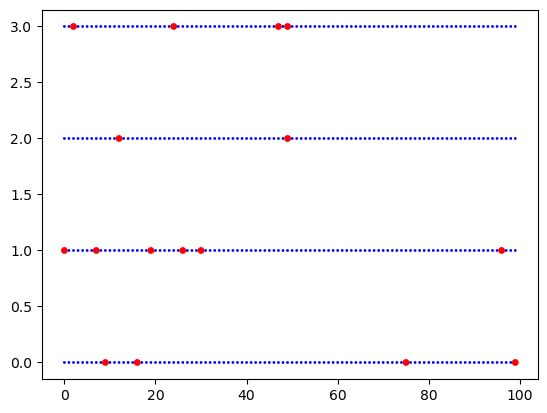

In [16]:
plot2D(np.arange(d.ncells[0]),np.arange(d.ncells[1]), xi, scattr=True, clr=colors, sz=sizes)

In [17]:
print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")

Fraction of total elements active in the ROM: 4.0%



### ROM Simulation

In [18]:
params_rm = params[~np.isin(params,param_list)]
param_rom = random.choice(params_rm)

In [21]:
# Define the data-class

d_test = probdata(bc, mat_layout, src_layout, fdict, nref, L, param_rom, pb_dim=2)
FOS_test = Base_class_fem_heat_conduction(d_test,quad_deg)
ROM = FEM_solver_rom_ecsw(d_test, quad_deg)

In [22]:
# Initial guess

T_init_fos = np.zeros(FOS_test.n_nodes) + 2.
T_init_rom = np.transpose(V_sel)@T_init_fos # crucial to ensure the initial guess is contained in the reduced subspace

In [23]:
# Time taken to perform a FO simulation with the current parameter value

tic_fos = time.time()
NL_solution_p_fos_test, _, _, _, = solve_fos(FOS_test,T_init_fos)
toc_fos = time.time()

initial residual = 17811.351812162153 

iter 0, NL residual=2574.5892480950088, delta=9.2745800184514
iter 1, NL residual=35.58148989244655, delta=-0.4457467523548467
iter 2, NL residual=0.007838277285041202, delta=-0.002937539422477103
iter 3, NL residual=4.2118167695382977e-10, delta=-1.2758877444464758e-07
Convergence !!!


In [24]:
# Time taken to simulate a ROM without hyper-reduction

tic_rom_woh = time.time()
NL_solution_p_reduced_woh = ROM.solve_rom(T_init_rom,np.ones_like(xi),V_sel)
toc_rom_woh = time.time()

initial residual = 7388.80462927942 



c:\Users\supar\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


iter 0, NL residual=75.46304765693392, delta=4.159250030684841
iter 1, NL residual=0.056588745092164994, delta=4.124806018911067
iter 2, NL residual=1.9687919701399823e-06, delta=0.012363166464142488
Convergence !!!


In [25]:
# Time taken to simulate a ROM *with* hyper-reduction

tic_rom = time.time()
NL_solution_p_reduced = ROM.solve_rom(T_init_rom,xi,V_sel)
toc_rom = time.time()

initial residual = 7388.738176063195 

iter 0, NL residual=75.4585216368789, delta=4.159188978551273
iter 1, NL residual=0.056683063042835186, delta=4.124312594853708
iter 2, NL residual=1.970301779801968e-06, delta=0.012359378682178221
Convergence !!!


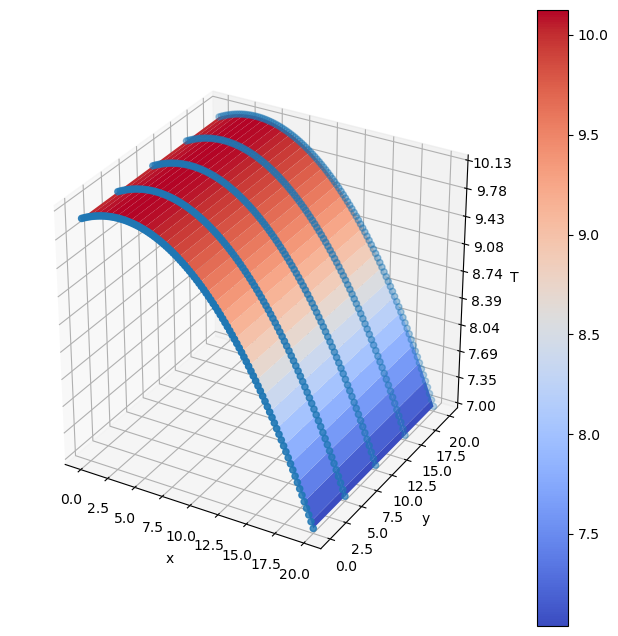

RMS_error is 0.0011536754162061902 %


In [26]:
sol_red = V_sel@NL_solution_p_reduced.reshape(-1,1)  #+pca.mean_.reshape(-1,1)
plot2D(d_test.xi[0], d_test.xi[1], sol_red)

print(f"RMS_error is {np.linalg.norm(sol_red-NL_solution_p_fos_test.reshape(-1,1))*100/np.linalg.norm(NL_solution_p_fos_test.reshape(-1,1))} %")

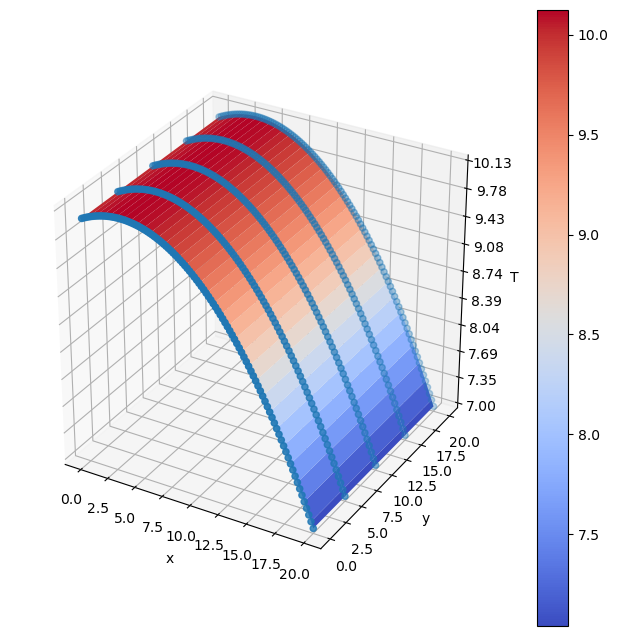



ROM Error without hyperreduction is 7.014551656442627e-08 %


In [27]:
plot2D(d_test.xi[0], d_test.xi[1], NL_solution_p_fos_test)

print(f"\n\nROM Error without hyperreduction is {np.linalg.norm(V_sel@NL_solution_p_reduced_woh.reshape(-1,1)-NL_solution_p_fos_test.reshape(-1,1))*100/np.linalg.norm(NL_solution_p_fos_test.reshape(-1,1))} %")


#### Speedups

In [28]:
fos_sim_time = toc_fos - tic_fos
rom_sim_time_woh = toc_rom_woh - tic_rom_woh
rom_sim_time = toc_rom - tic_rom

In [29]:
print(f"speedup without hyperreduction:{fos_sim_time/rom_sim_time_woh}")
print(f"speedup with hyperreduction:{fos_sim_time/(rom_sim_time)}")
# h_total_setup_time = (toc_h_setup_b+toc_h_setup_a) - (tic_h_setup_b+tic_h_setup_a) #this is one time

speedup without hyperreduction:1.2730892526593507
speedup with hyperreduction:22.462424413105627
